# 10 Year Historical Analysis of Market Volatility

### By: Dillon Graveline

*Created for the Integrative Project Paper*

*All Calculations done on 2019-04-19*

## Setup

In [9]:
# Import neccesary modules 
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters

# Set variables
start_date = datetime.date(2009,1,19)
end_date = datetime.date(2019,4,19)

## Grab ^GSPC (S&P500) Data From Yahoo API

In [10]:
# Time frame is 10 years
sp500 = pdr.DataReader('^GSPC','yahoo',start_date,end_date) # Grabs data from yahoo api
sp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-20,849.640015,804.469971,849.640015,805.219971,6375230000,805.219971
2009-01-21,841.719971,804.299988,806.770020,840.239990,6467830000,840.239990
2009-01-22,839.739990,811.289978,839.739990,827.500000,5843830000,827.500000
2009-01-23,838.609985,806.070007,822.159973,831.950012,5832160000,831.950012
2009-01-26,852.530029,827.690002,832.500000,836.570007,6039940000,836.570007


## Sanitize the DataFrame

In [11]:
# Drop unneccesary columns
sp500_close = pd.DataFrame()
sp500_close['Close']= sp500['Close']
sp500_close.head()

,Close
Date,
2009-01-20,805.219971
2009-01-21,840.239990
2009-01-22,827.500000
2009-01-23,831.950012
2009-01-26,836.570007


## Calculate 3 Month Rolling Standard Deviation

In [12]:
# Calculate rolling standard deviation with a window of 65 trading periods
sp500_close['Volatility'] = sp500_close.Close.rolling(65).std()
sp500_close.tail()

,Close,Volatility
Date,,
2019-04-12,2907.409912,85.956815
2019-04-15,2905.580078,85.129867
2019-04-16,2907.060059,84.046435
2019-04-17,2900.449951,82.022643
2019-04-18,2905.030029,80.754382


In [13]:
# Prepare DataFrame for plotting
sp500_close = sp500_close.dropna()
sp500_close1 = pd.DataFrame()
sp500_close1 = sp500_close.reset_index()
sp500_closex = pd.DataFrame()
sp500_closex = sp500_close1.reset_index()

## Plot the Data

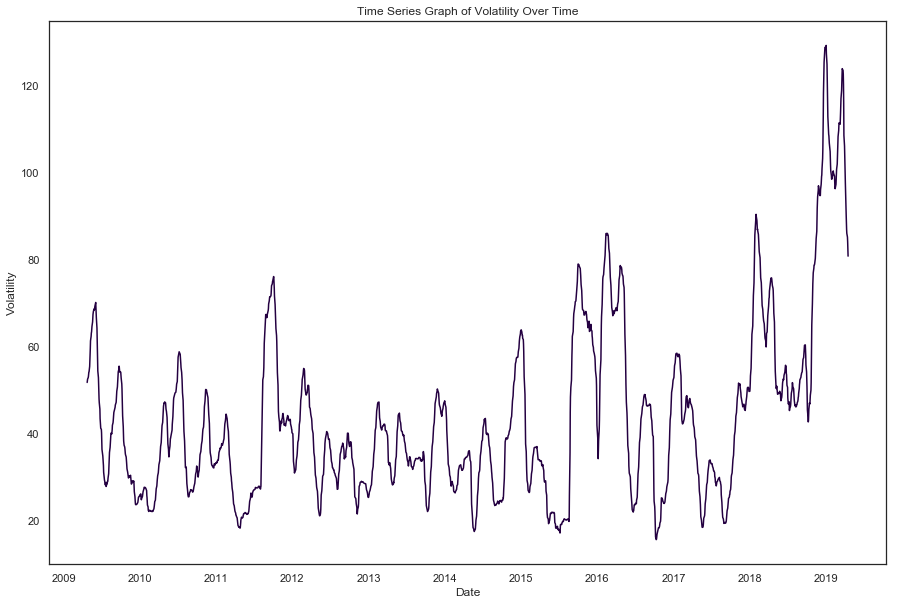

In [14]:
# Plot time series graph using Seaborn and MatPlotLib
register_matplotlib_converters()
plt.figure(figsize=(15,10))
sns.set(style="white")
g1 = sns.lineplot(x="Date", y="Volatility", data=sp500_closex, color = '#240041'
                 ).set_title('Time Series Graph of Volatility Over Time')

### It is hard to determine the overall trend of volatility, so an ordinary least squares regression must be computed

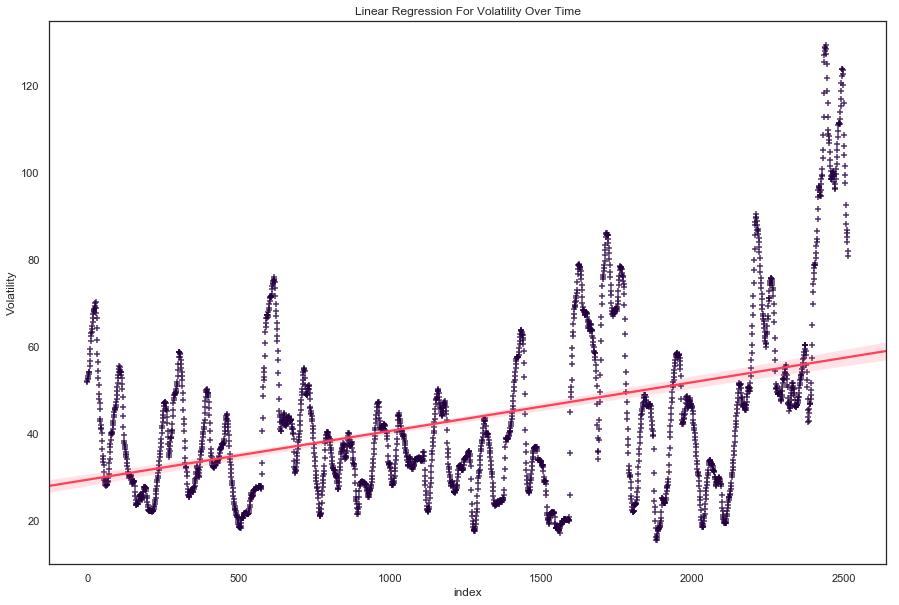

In [15]:
# Plot linear regression using each standard deviation window as a node
plt.figure(figsize=(15,10))
g2 = sns.regplot(x="index", y="Volatility", data=sp500_closex, color = '#240041', 
                marker = "+", line_kws={'color':'#ff4057'}
                ).set_title('Linear Regression For Volatility Over Time')

In [16]:
# Use StatsModels to calculate OLS Regression
X = sp500_closex['index']
y = sp500_closex['Volatility']
X1 = sm.add_constant(X)
model = sm.OLS(y, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Volatility   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     488.6
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           4.46e-99
Time:                        08:00:18   Log-Likelihood:                -10902.
No. Observations:                2516   AIC:                         2.181e+04
Df Residuals:                    2514   BIC:                         2.182e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4324      0.735     40.041      0.0

## Conclusion

Volatility is increasing at a rate of 0.0112 per year.